In [117]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from IPython.display import display, HTML
import numpy as np
import json
from scipy import stats
import math

from datetime import datetime
plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

In [118]:
root = '../data_storage'
file_names = []
dates = []

for subdir, dirs, files in os.walk(root):
    for file in files:
        file_names.append(os.path.join(subdir, file).replace('\\', '/'))
        
        datetime_object = datetime.strptime(file[5:-9], '%d %b %Y %H:%M:%S')
        dates.append(datetime_object)
        
youngest = max(dates)

for file in files:
    datetime_object = datetime.strptime(file[5:-9], '%d %b %Y %H:%M:%S')
    if(datetime_object == youngest):
        youngest = '../data_storage/' + file

In [119]:
main_frame = pd.DataFrame()
length = []

for f in file_names:
    df = pd.read_json(f)
    current_date = datetime.strptime(f[21:-9], '%d %b %Y %H:%M:%S')
    df['created_at'] = current_date
    length.append([current_date, len(df.index)])
    main_frame = main_frame.append(df)
    
youngest_frame = pd.read_json(youngest)
number_of_hospitals = pd.DataFrame(length, columns = ['collection_date', 'hospital_number']) 

# Zahl der Krankenhäuser

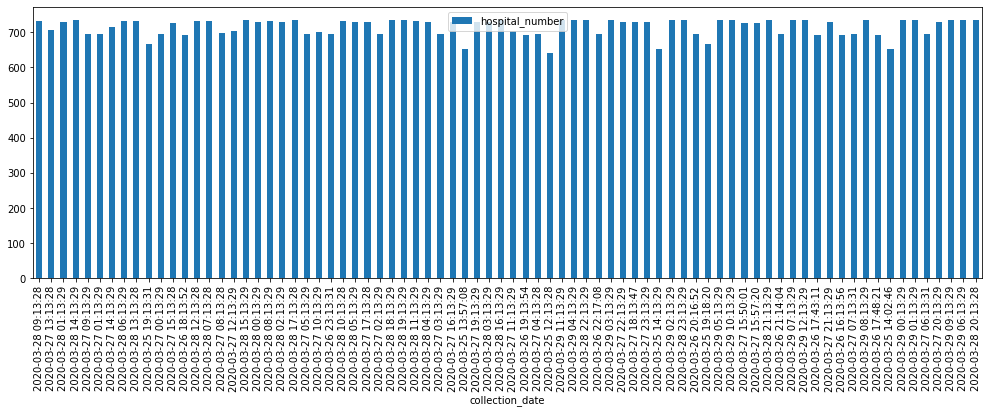

In [120]:
number_of_hospitals.collection_date = pd.to_datetime(number_of_hospitals['collection_date'])
number_of_hospitals.set_index('collection_date', inplace=True)
number_of_hospitals.plot(kind="bar")

In [121]:
youngest_frame

,hospital,contact,fed,icu_low_care,icu_high_care,updated,ecmo
0,"Sana Dreifaltigkeits-Krankenhaus Köln, Anästhe...",Intensivstation Website,NRW,red,red,"29.03.2020, 11:39",NaN
1,"Elbe-Elster-Klinikum, Standort Finsterwalde, A...",Intensivtation Standort Finsterwalde Website,BB,green,green,"28.03.2020, 15:24",NaN
2,Medizin Campus Bodensee - Klinikum Friedrichsh...,Website,BW,green,green,"29.03.2020, 13:54",NaN
3,"Krankenhaus Bethel Berlin, Anästhesie und Inte...",ITS Website,BE,green,green,"28.03.2020, 10:32",NaN
4,"Christophoruskliniken Coesfeld, Südring 41, 48...",cD1 Interdisziplinäre Intensivstation Website,NRW,green,green,"27.03.2020, 16:42",NaN
...,...,...,...,...,...,...,...
731,"Brüderkrankenhaus Trier, 3. medizinische Klini...",Intensivstation 1E Herzzentrum Website,RP,yellow,yellow,"27.03.2020, 07:59",green
732,"Universitätsklinikum Hamburg-Eppendorf, Klinik...",Website,HH,green,green,"29.03.2020, 09:13",green
733,"Universitätsklinikum Erlangen, Intensivmedizin...",Koordination Website,BY,green,green,"27.03.2020, 15:15",green
734,"Klinikum Nürnberg, Klinik für Innere Medizin 3...",Website,BY,green,green,"20.03.2013, 09:26",green


# Anzahl der Krankenhäuser pro Bundesland

# Letzter Stand

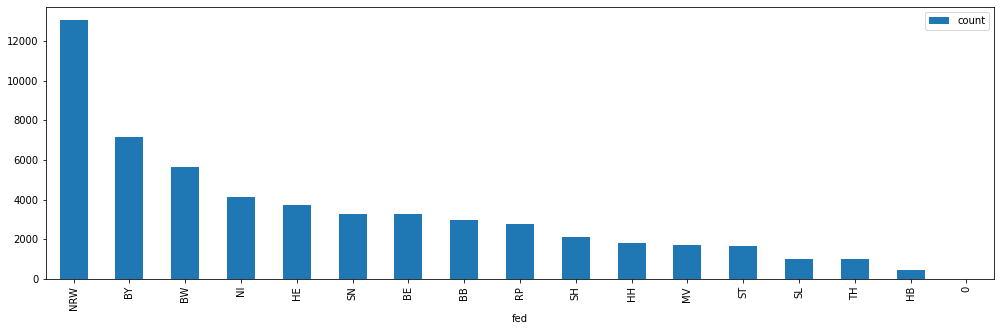

In [122]:
fed_count = pd.DataFrame({'count' : main_frame.groupby('fed').count()['hospital']}).reset_index()
fed_count = fed_count.sort_values(by=['count'], ascending=False)
fed_count = fed_count.set_index('fed')

fed_count.plot(kind='bar')

# Anzahl der Betten - Intensivbetten ohne invasive Beatmungsmöglichkeit (Monitoring, Überwachung, ggf. nicht-invasive Beatmung möglich)

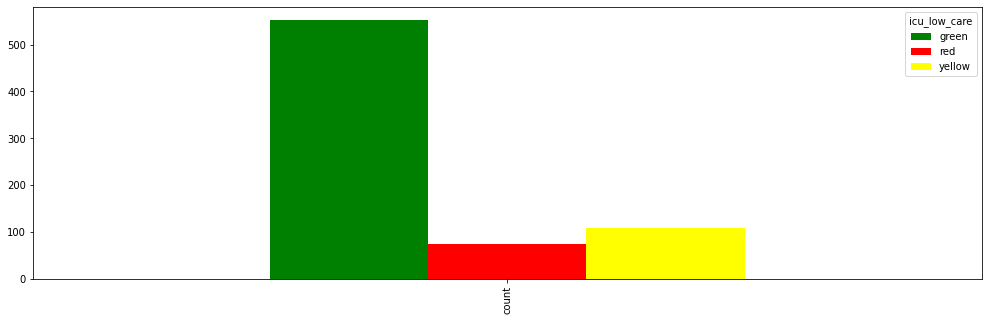

In [123]:
status_icu_low_care_count = pd.DataFrame({'count' : youngest_frame.groupby('icu_low_care').count()['hospital']}).reset_index()
status_icu_low_care_count  = status_icu_low_care_count.set_index('icu_low_care')

status_icu_low_care_count.transpose().plot(kind="bar", color=['green', 'red', 'yellow'])

# Anzahl der Betten - Intensivbetten mit invasiver Beatmungsmöglichkeit (Beatmungsbetten)

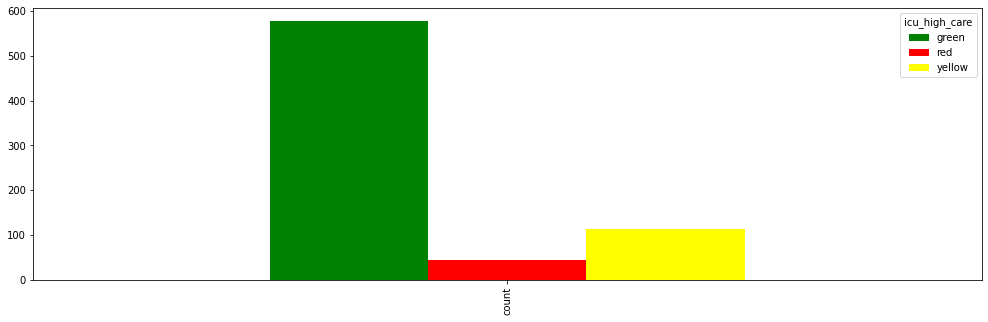

In [124]:
status_icu_high_care_count = pd.DataFrame({'count' : youngest_frame.groupby('icu_high_care').count()['hospital']}).reset_index()
status_icu_high_care_count  = status_icu_high_care_count.set_index('icu_high_care')

status_icu_high_care_count.transpose().plot(kind="bar", color=['green', 'red', 'yellow'])



# Zeitlicher Verlauf der Betten-Belegung

In [125]:
#pd.DataFrame({'count' : main_frame.groupby('updated').count()['hospital']}).reset_index()
column_values = main_frame[["icu_low_care", "updated", "hospital"]].values
index = pd.Index(column_values)

frame = index.to_frame()
frame.columns = ["All"]
frame = frame.reset_index().drop(['index'], axis=1)
frame['freq'] = frame.groupby('All')['All'].transform('count')
print(frame)

                                                     All  freq
0      (green, 28.03.2020, 08:48, Kreisklinik Wolfrat...    23
1      (green, 27.03.2020, 18:20, Klinikum-Bremen-Nor...    22
2      (yellow, 27.03.2020, 17:00, Helios Frankenwald...    45
3      (green, 27.03.2020, 16:10, St. Irmgardis Sücht...    48
4      (yellow, 27.03.2020, 16:00, Schön Klinik Bad S...    48
...                                                  ...   ...
55783  (yellow, 27.03.2020, 07:59, Brüderkrankenhaus ...    56
55784  (green, 26.03.2020, 12:50, Universitätskliniku...    67
55785  (green, 27.03.2020, 15:15, Universitätskliniku...    48
55786  (green, 20.03.2013, 09:26, Klinikum Nürnberg, ...    74
55787  (green, 26.03.2020, 16:15, Elisabeth-Krankenha...    71

[55788 rows x 2 columns]


In [126]:
index = pd.Index([2, 2, 2, 5,5,5,5,5,5, 3, 4,4,4,4])
index.value_counts()

main_frame = main_frame.drop_duplicates(subset=df.columns.difference(['created_at']), keep='first', inplace=False)

main_frame['updated'] = main_frame['updated'].map(lambda x: str(x)[:-2]+"00")
main_frame

,hospital,contact,fed,icu_low_care,icu_high_care,updated,ecmo,created_at
0,"Kreisklinik Wolfratshausen, Moosbauerweg 5, 82...",Website,BY,green,green,"28.03.2020, 08:00",NaN,2020-03-28 09:13:28
1,"Klinikum-Bremen-Nord, Klinik für Anästhesiolog...",Intensivstation Website,HB,green,green,"27.03.2020, 18:00",NaN,2020-03-28 09:13:28
2,"Helios Frankenwaldklinik Kronach, Anästhesie, ...",4a Website,BY,yellow,yellow,"27.03.2020, 17:00",NaN,2020-03-28 09:13:28
3,"St. Irmgardis Süchteln GmbH, Anästhesiologie, ...",Intensivstation Website,NRW,green,green,"27.03.2020, 16:00",NaN,2020-03-28 09:13:28
4,"Schön Klinik Bad Staffelstein, Neurologie, Am ...",Frührehabiltation Website,BY,yellow,red,"27.03.2020, 16:00",NaN,2020-03-28 09:13:28
...,...,...,...,...,...,...,...,...
84,"Rotkreuzklinikum München, Interdisziplinäre In...",Website,BY,green,red,"29.03.2020, 09:00",NaN,2020-03-29 08:13:29
202,"Helios Park-Klinikum Leipzig, Strümpelstraße 4...",Website,SN,yellow,green,"29.03.2020, 10:00",NaN,2020-03-29 08:13:29
318,"Kliniken HochFranken, Zentrale Anästhesie und ...",Münchberg Station 1A Naila Station O2 Website,BY,yellow,green,"29.03.2020, 09:00",NaN,2020-03-29 08:13:29
499,"Malteser Krankenhaus St. Hildegardis, Abteilun...",Interdisziplinäre Intensivstation Website,NRW,green,green,"29.03.2020, 10:00",NaN,2020-03-29 08:13:29


# Zeitlicher Verlauf - icu_low_care

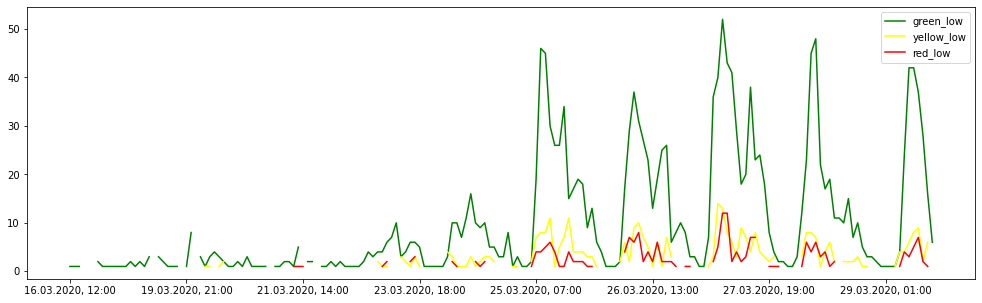

In [150]:
status_low_green = main_frame.loc[main_frame['icu_low_care'] == "green"].groupby('updated').count()['hospital'].to_frame()
status_low_green = status_low_green.rename(columns={"hospital": "green_low"})
status_low_yellow = main_frame.loc[main_frame['icu_low_care'] == "yellow"].groupby('updated').count()['hospital'].to_frame()
status_low_yellow = status_low_yellow.rename(columns={"hospital": "yellow_low"})
status_low_red = main_frame.loc[main_frame['icu_low_care'] == "red"].groupby('updated').count()['hospital'].to_frame()
status_low_red = status_low_red.rename(columns={"hospital": "red_low"})

result = pd.concat([status_low_green, status_low_yellow, status_low_red], axis=1)
result = result.sort_index()
result.plot(kind="line",  color=['green', 'yellow', 'red'])

# Zeitlicher Verlauf - icu_high_care

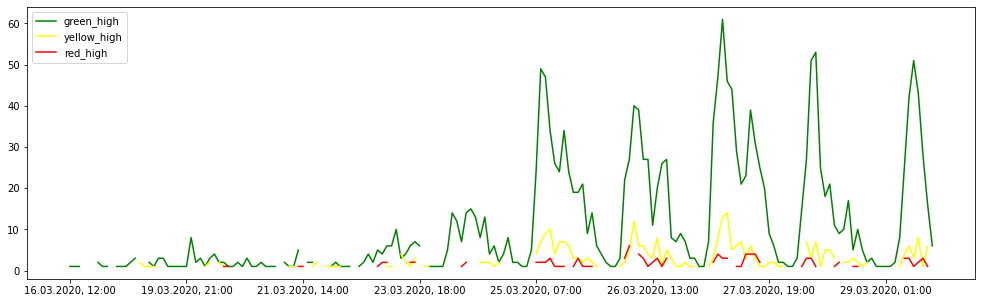

In [153]:
status_high_green = main_frame.loc[main_frame['icu_high_care'] == "green"].groupby('updated').count()['hospital'].to_frame()
status_high_green = status_high_green.rename(columns={"hospital": "green_high"})
status_high_yellow = main_frame.loc[main_frame['icu_high_care'] == "yellow"].groupby('updated').count()['hospital'].to_frame()
status_high_yellow = status_high_yellow.rename(columns={"hospital": "yellow_high"})
status_high_red = main_frame.loc[main_frame['icu_high_care'] == "red"].groupby('updated').count()['hospital'].to_frame()
status_high_red = status_high_red.rename(columns={"hospital": "red_high"})

result = pd.concat([status_high_green, status_high_yellow, status_high_red], axis=1)
result = result.sort_index()
result.plot(kind="line",  color=['green', 'yellow', 'red'])

# Zeitlicher Verlauf - ecmo

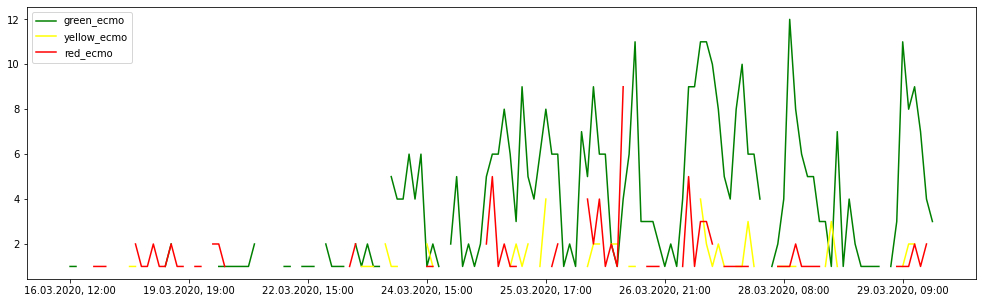

In [154]:
status_ecmo_green = main_frame.loc[main_frame['ecmo'] == "green"].groupby('updated').count()['hospital'].to_frame()
status_ecmo_green = status_ecmo_green.rename(columns={"hospital": "green_ecmo"})
status_ecmo_yellow = main_frame.loc[main_frame['ecmo'] == "yellow"].groupby('updated').count()['hospital'].to_frame()
status_ecmo_yellow = status_ecmo_yellow.rename(columns={"hospital": "yellow_ecmo"})
status_ecmo_red = main_frame.loc[main_frame['ecmo'] == "red"].groupby('updated').count()['hospital'].to_frame()
status_ecmo_red = status_ecmo_red.rename(columns={"hospital": "red_ecmo"})

result = pd.concat([status_ecmo_green, status_ecmo_yellow, status_ecmo_red], axis=1)
result = result.sort_index()
result.plot(kind="line",  color=['green', 'yellow', 'red'])

# Zeitlicher Verlauf - icu_low_care & icu_high_care & ecmo

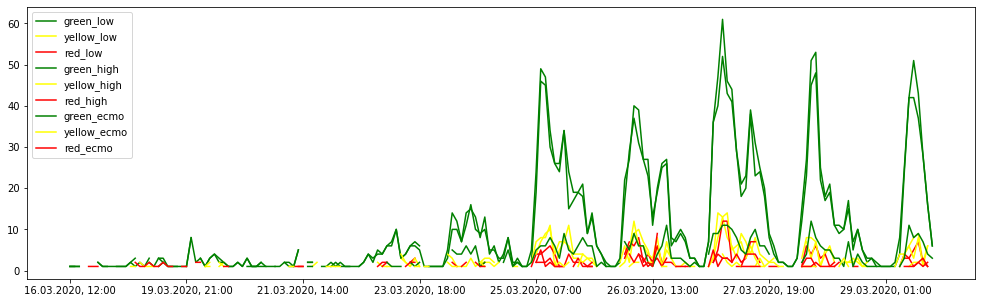

In [163]:
result_main = pd.concat([
    status_low_green, status_low_yellow, status_low_red,
    status_high_green, status_high_yellow, status_high_red, 
    status_ecmo_green, status_ecmo_yellow, status_ecmo_red], axis=1)

result_main = result_main.sort_index()
result_main.plot(kind="line",  color=['green', 'yellow', 'red'])
